## **Esempio di immagini del dataset MNIST**

# **Cos’è MNIST?**

MNIST (Modified National Institute of Standards and Technology database) è un dataset molto famoso e usato come benchmark per reti neurali.

*   Contenuto: 70.000 immagini in scala di grigi di cifre scritte a mano (0-9).
*   Dimensione immagini: 28x28 pixel (quindi 784 pixel per immagine).
*   Suddivisione:
1.   60.000 immagini per l’addestramento (training set),
2.  10.000 per il test (test set).

**Obiettivo**:  costruire un modello in grado di riconoscere quale cifra è scritta nell’immagine.

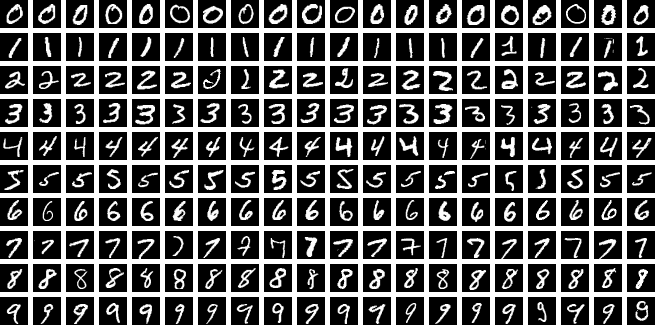

# **1. Cos'è TensorFlow?**



*   TensorFlow è una libreria di deep learning completa, sviluppata da Google.
*   Ti permette di costruire, addestrare, e distribuire modelli di machine learning e deep learning.
*   È basso livello: puoi controllare ogni dettaglio del modello, dei tensori, del grafo computazionale, ecc.












In [ ]:
# 1. Import delle librerie principali
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 2. Caricamento del dataset MNIST.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 3. Normalizzazione dei pixel (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0


mnist.load_data(): restituisce le immagini e le etichette già suddivise in training e test set.

Divisione per 255.0: normalizzazione dei pixel (che originariamente vanno da 0 a 255) nel range [0, 1], utile per migliorare l’apprendimento.



In [ ]:
# 4. One-hot encoding delle etichette (0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Le etichette (numeri da 0 a 9) vengono trasformate in vettori binari di lunghezza 10.

Esempio: la cifra 3 diventa [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [ ]:
# 5. Costruzione della rete neurale (modello Sequential)
model = Sequential([
    Flatten(input_shape=(28, 28)),         # da immagine 28x28 a vettore 784
    Dense(128, activation='relu'),         # primo strato nascosto
    Dense(10, activation='softmax')        # output: 10 classi
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Sequential**

Sequential indica che il modello è lineare, cioè gli strati sono aggiunti uno dopo l’altro.

* Usiamo questo approccio quando la rete è feed-forward, cioè i dati passano una sola volta attraverso la rete, senza cicli o salti.

# **Flatten**

*Flatten(input_shape=(28, 28)):* trasforma l’immagine 2D (28x28) in un vettore 1D (di 784 elementi). Serve per collegare le immagini ai layer densi.

# **Dense**

Dense crea uno strato completamente connesso:


*   *Dense(128, activation='relu'):* 128 neuroni con funzione di attivazione ReLU (Rectified Linear Unit), che introduce non-linearità.
*   *Dense(10, activation='softmax'):* strato finale con 10 neuroni (uno per cifra), attivazione softmax per trasformare le uscite in probabilità.





In [ ]:
# 6. Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Pesi (Weights)**
Sono i valori numerici interni che la rete apprende durante il training.
Ogni connessione tra neuroni ha un peso che regola quanto un input influenza l’output.

La rete impara modificando questi pesi per minimizzare la loss.


# **Epoca**
Una epoca è un passaggio completo su tutto il dataset di addestramento.
Durante ogni epoca, la rete vede ogni esempio almeno una volta e aggiorna i pesi dopo ogni batch.


# **Batch**
Un batch è un piccolo insieme di esempi del dataset, utilizzato per calcolare la loss e aggiornare i pesi una volta.
Allenare la rete in batch riduce i tempi di calcolo e rende il training più stabile.


*   L’intero dataset è diviso in batch → su ognuno si calcolano i gradienti
*   Quando la rete ha visto tutti i batch, si conclude una epoca
*   Di solito si usano più epoche, per permettere alla rete di apprendere meglio



# **Funzione di perdita (Loss Function)**

Serve a dire alla rete quanto ha sbagliato.

Ogni volta che la rete fa una predizione, confronta il risultato con la risposta corretta (etichetta).

La funzione di perdita calcola l’errore tra questi due valori.

Esempi:

*  categorical_crossentropy per classificazione multi-classe
*  mean_squared_error per regressione



# **Gradiente (Gradient)**


È il valore che indica quanto un peso deve essere modificato.
Viene calcolato tramite backpropagation e serve all’ottimizzatore per aggiornare i pesi. Dice quanto e in che direzione cambiare.


# **Backpropagation**
È l’algoritmo che calcola i gradienti, strato dopo strato, partendo dalla fine verso l’inizio.


# **Algoritmo di ottimizzazione (Optimizer)**
Serve ad aggiornare i pesi della rete per ridurre la perdita.

Dopo ogni errore calcolato con la loss, l’ottimizzatore interviene per "correggere i pesi" nei layer, così che la prossima volta l’errore sia più basso. Applica il cambiamento ai pesi.

Esempi:

*   Adam: stabile e veloce, molto usato
*   SGD: semplice, ma richiede tuning attento


# **Funzioni di attivazione (Activation Functions)**
Decidono quando un neurone si **attiva**.
Permettono alla rete di modellare relazioni non lineari.

Esempi:

*   ReLU: veloce, standard nei layer nascosti
*  Softmax: trasforma l’output in probabilità
*  Sigmoid: per classificazione binaria


Pensate a:


1.   128 critici d’arte (neuroni),

2.   tutti guardano lo stesso quadro (input),

3.  ma ognuno ha gusti diversi (pesi diversi),

4.  
e reagisce solo a certi elementi (attivazione),
5. alla fine, ognuno dà il suo voto personale (output).



# **Learning Rate (Tasso di apprendimento)**
Controlla quanto grande è il passo che l’ottimizzatore fa quando aggiorna i pesi usando i gradienti.

*  Se è troppo alto → la rete diverge
*  Se è troppo basso → la rete è lenta o si blocca
*  Va scelto con attenzione o regolato durante l’allenamento





















In [ ]:
# 7. Training del modello
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 8. Valutazione del modello sui dati di test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# **1. Cos'è PyTorch?**



*   PyTorch è una libreria open source per il deep learning, sviluppata da Meta (Facebook).
*   È dinamica: costruisce i grafi computazionali durante l’esecuzione, rendendo il debugging molto più facile.
*   Tutto è facilmente ispezionabile, il che aiuta a capire cosa succede dentro la rete.


In [ ]:
# PYTORCH
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Trasformazioni per normalizzare MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32)

# Definizione modello
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

model = Net()

# Ottimizzatore e funzione di perdita
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento
for epoch in range(5):
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/5 completata.")

# Valutazione
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test accuracy (PyTorch): {accuracy:.4f}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.81MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.12MB/s]


Epoch 1/5 completata.
Epoch 2/5 completata.
Epoch 3/5 completata.
Epoch 4/5 completata.
Epoch 5/5 completata.
Test accuracy (PyTorch): 0.9633
